<a href="https://colab.research.google.com/github/ShinwooChoi/ESAA/blob/main/09_05_%E1%84%89%E1%85%A6%E1%84%89%E1%85%A7%E1%86%AB_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2_%E1%84%8B%E1%85%A7%E1%86%AB%E1%84%89%E1%85%B3%E1%86%B8%E1%84%86%E1%85%AE%E1%86%AB%E1%84%8C%E1%85%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **분류 연습 문제**
___
출처 : 핸즈온 머신러닝 Ch03 분류 연습문제 1, 2번

In [1]:
# import data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### **1. MNIST 데이터셋으로 분류기를 만들어 테스트 세트에서 97% 정확도를 달성해보세요.**
___

1. `KNeghtborsClassifier`를 사용하는 것을 추천합니다.
2. `weights`와 `n_neighbors` 하이퍼 파라미터로 그리드 탐색을 시도하여, 좋은 하이퍼 파라미터 값을 찾아보세요.

In [4]:
# import package
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import ssl

# SSL 문제 우회
ssl._create_default_https_context = ssl._create_unverified_context

# 데이터 불러오기
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

# train/test split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# KNN + GridSearch
param_grid = {
    'n_neighbors': [3, 4, 5],
    'weights': ['uniform', 'distance']
}

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy', n_jobs=2)
grid_search.fit(X_train[:10000], y_train[:10000])  # Colab에서는 일부 데이터만 먼저 사용 권장

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# 최종 모델 테스트
y_pred = grid_search.predict(X_test[:2000])  # Colab 메모리 절약 위해 일부만 테스트
print("Test accuracy:", accuracy_score(y_test[:2000], y_pred))


Best params: {'n_neighbors': 4, 'weights': 'distance'}
Best score: 0.9397994088551026
Test accuracy: 0.93


In [7]:
# best hyperparameter
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [8]:
# best score
grid_search.best_score_

np.float64(0.9397994088551026)

In [9]:
# model test
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9505

### **2. 다음 단계를 따라 인위적으로 훈련 세트를 늘리는 데이터 증식 또는 훈련 세트 확장 기법을 연습해봅시다.**
___

#### **STEP 1. MNIST 이미지를 (왼, 오른, 위, 아래) 어느 방향으로든 한 픽셀 이동시킬 수 있는 함수를 만들어 보세요.**

In [10]:
# STEP 1
from scipy.ndimage.interpolation import shift
import numpy as np
import matplotlib.pyplot as plt

def shift_image(image, dx, dy):
    image = image.reshape(28, 28)
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape(-1)

/tmp/ipython-input-1895556978.py:2: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


####  **STEP 2. 앞에서 만든 함수를 이용하여, 훈련 세트에 있는 각 이미지에 대해 네 개의 이동된 복사본(방향마다 한 개씩)을 만들어 훈련 세트에 추가하세요**

In [11]:
image = X_train[1000]

shifted_image_down = shift_image(image, 0, 5)
shifted_image_up = shift_image(image, 0, -1)
shifted_image_left = shift_image(image, -5, 0)
shifted_image_right = shift_image(image, 1, 0)


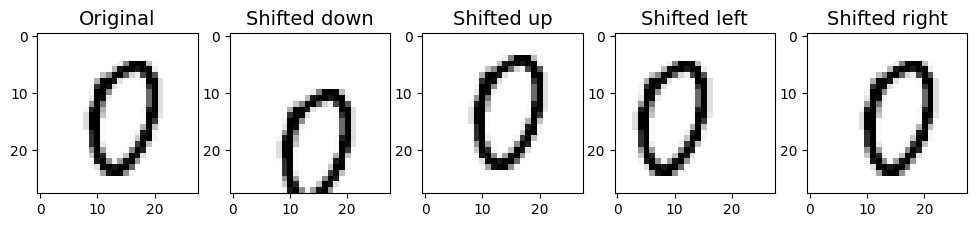

In [12]:
plt.figure(figsize=(12,3))
plt.subplot(1,5,1)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(1,5,2)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(1,5,3)
plt.title("Shifted up", fontsize=14)
plt.imshow(shifted_image_up.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(1,5,4)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(1,5,5)
plt.title("Shifted right", fontsize=14)
plt.imshow(shifted_image_right.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [13]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [14]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

####  **STEP 3. 위에서 확장한 데이터셋을 이용하여, 1번 문제에서 찾은 최적 모델을 훈련시키고, 테스트 세트에서 정확도를 측정해보세요**

In [15]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [16]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [1]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763
